In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Transfer Learning

transfer learning means using the existing model and training it on the new data
 for our problems

 There are 3 types of transfer learning:
 1. Fine Tuning
 2. Feature Extraction
 3. As is , Instant using model

In [1]:
mobilenet_v2 = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-feature-vector/2"
resnet50 = "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/feature-vector/1"
effnet_v2 = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet21k-b0-feature-vector/1"

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-07-19 08:08:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.8MB/s    in 8.8s    

2024-07-19 08:08:38 (18.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



# Working with 10 percent data  of 10 food items

In [3]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in {dirpath}")

There are 2 and 0 images in 10_food_classes_10_percent
There are 10 and 0 images in 10_food_classes_10_percent/test
There are 0 and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 and 250 images in 10_food_classes_10_percent/test/sushi
There are 0 and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 and 250 images in 10_food_classes_10_percent/test/steak
There are 0 and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 10 and 0 images in 10_food_classes_10_percent/train
There are 0 and 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 and 75 images in 10_

# Efficientnet_v2

## Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Creating the model

In [7]:
## importing model from tensorflowhub

import tensorflow as tf
import tensorflow_hub as hub


effnet_model = tf.keras.Sequential([hub.KerasLayer(effnet_v2,trainable=False,input_shape = (224,224,3),name = "effnet_v2"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

effnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

## creating callback

In [8]:
def create_tensorboard_callback(dir_name, experiment_name):
  import datetime
  log_dir = dir_name + "/" + experiment_name + "/"+ datetime.datetime.now().strftime("%y%m%d-%H%M")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir)
  print(f"Saving Tensorboard log files to :{log_dir}")
  return tensorboard_callback

## Fitting the model

In [9]:
history_effnet = effnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name = "effnet_v2")])

Saving Tensorboard log files to :tensorflow_hub/effnet_v2/240719-0809
Epoch 1/5
24/24 [==============================] - 25s 562ms/step - loss: 1.8748 - accuracy: 0.4413 - val_loss: 0.7301 - val_accuracy: 0.7604
Epoch 2/5
24/24 [==============================] - 11s 457ms/step - loss: 0.5782 - accuracy: 0.8187 - val_loss: 0.4674 - val_accuracy: 0.8392
Epoch 3/5
24/24 [==============================] - 11s 468ms/step - loss: 0.3632 - accuracy: 0.8933 - val_loss: 0.3976 - val_accuracy: 0.8680
Epoch 4/5
24/24 [==============================] - 12s 537ms/step - loss: 0.2520 - accuracy: 0.9333 - val_loss: 0.3749 - val_accuracy: 0.8800
Epoch 5/5
24/24 [==============================] - 10s 444ms/step - loss: 0.1724 - accuracy: 0.9627 - val_loss: 0.3670 - val_accuracy: 0.8828


# Resnet50

In [10]:
## Creating the model
import tensorflow as tf
import tensorflow_hub as hub
resnet_model = tf.keras.Sequential([
    hub.KerasLayer(resnet50,trainable = False , input_shape = (224,224,3),name = "resnet50"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

## Fitting the model

In [11]:
history_resnet = resnet_model.fit(train_data,
                 epochs =5,
                 steps_per_epoch = len(train_data),
                 validation_data = test_data,
                 validation_steps = len(test_data),
                 callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub",experiment_name = "resnet50")])

Saving Tensorboard log files to :tensorflow_hub/resnet50/240719-0811
Epoch 1/5
24/24 [==============================] - 25s 647ms/step - loss: 1.7639 - accuracy: 0.4333 - val_loss: 1.0535 - val_accuracy: 0.6620
Epoch 2/5
24/24 [==============================] - 13s 562ms/step - loss: 0.8230 - accuracy: 0.7573 - val_loss: 0.7244 - val_accuracy: 0.7820
Epoch 3/5
24/24 [==============================] - 13s 545ms/step - loss: 0.5477 - accuracy: 0.8507 - val_loss: 0.6199 - val_accuracy: 0.8056
Epoch 4/5
24/24 [==============================] - 11s 474ms/step - loss: 0.4245 - accuracy: 0.9013 - val_loss: 0.5711 - val_accuracy: 0.8196
Epoch 5/5
24/24 [==============================] - 11s 480ms/step - loss: 0.3312 - accuracy: 0.9213 - val_loss: 0.5714 - val_accuracy: 0.8120


# mobilenetv2

## creating the model

In [12]:
mobilenet_model = tf.keras.Sequential([
    hub.KerasLayer(mobilenet_v2 , trainable = False , input_shape = (224,224,3)),
    tf.keras.layers.Dense(10, activation = "softmax")
])

mobilenet_model.compile(loss = "categorical_crossentropy",
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['accuracy'])

In [13]:
mobilebnet_history = mobilenet_model.fit(train_data,
                                         epochs = 5,
                                         steps_per_epoch = len(train_data),
                                         validation_data = test_data,
                                         validation_steps = len(test_data),
                                         callbacks = [create_tensorboard_callback("tensorflow_hub","mobilenet_v2")])

Saving Tensorboard log files to :tensorflow_hub/mobilenet_v2/240719-0813
Epoch 1/5
24/24 [==============================] - 16s 465ms/step - loss: 2.0425 - accuracy: 0.2733 - val_loss: 1.5041 - val_accuracy: 0.5204
Epoch 2/5
24/24 [==============================] - 10s 432ms/step - loss: 1.2451 - accuracy: 0.6253 - val_loss: 1.1207 - val_accuracy: 0.6660
Epoch 3/5
24/24 [==============================] - 8s 352ms/step - loss: 0.9403 - accuracy: 0.7280 - val_loss: 0.9793 - val_accuracy: 0.7108
Epoch 4/5
24/24 [==============================] - 10s 413ms/step - loss: 0.7707 - accuracy: 0.7960 - val_loss: 0.9046 - val_accuracy: 0.7252
Epoch 5/5
24/24 [==============================] - 10s 419ms/step - loss: 0.6507 - accuracy: 0.8347 - val_loss: 0.8586 - val_accuracy: 0.7296


In [14]:
mobilenet_history = mobilenet_model.fit(train_data,
                                        epochs = 10,
                                        steps_per_epoch = len(train_data),
                                        validation_data = test_data,
                                        validation_steps = len(test_data),
                                        callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub",experiment_name="mobilenet_v2")])

Saving Tensorboard log files to :tensorflow_hub/mobilenet_v2/240719-0814
Epoch 1/10
24/24 [==============================] - 9s 373ms/step - loss: 0.5650 - accuracy: 0.8680 - val_loss: 0.8273 - val_accuracy: 0.7396
Epoch 2/10
24/24 [==============================] - 10s 413ms/step - loss: 0.4971 - accuracy: 0.8973 - val_loss: 0.8151 - val_accuracy: 0.7372
Epoch 3/10
24/24 [==============================] - 10s 415ms/step - loss: 0.4437 - accuracy: 0.9240 - val_loss: 0.8021 - val_accuracy: 0.7348
Epoch 4/10
24/24 [==============================] - 12s 533ms/step - loss: 0.3958 - accuracy: 0.9307 - val_loss: 0.7825 - val_accuracy: 0.7420
Epoch 5/10
24/24 [==============================] - 12s 533ms/step - loss: 0.3537 - accuracy: 0.9533 - val_loss: 0.7783 - val_accuracy: 0.7424
Epoch 6/10
24/24 [==============================] - 9s 376ms/step - loss: 0.3224 - accuracy: 0.9613 - val_loss: 0.7705 - val_accuracy: 0.7480
Epoch 7/10
24/24 [==============================] - 10s 408ms/step - lo

In [15]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg

--2024-07-19 08:16:16--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [ <=>                ] 272.03K  --.-KB/s    in 0.02s   

2024-07-19 08:16:17 (15.0 MB/s) - ‘03-hamburger.jpeg’ saved [278562]



In [16]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg

--2024-07-19 08:16:17--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg           [ <=>                ] 271.82K  --.-KB/s    in 0.01s   

2024-07-19 08:16:17 (20.8 MB/s) - ‘03-sushi.jpeg’ saved [278348]



In [17]:
def load_img (filename):
  img =tf.io.read_file(filename)
  img = tf.io.decode_jpeg(img,channels =3)
  img = tf.image.resize(img , size =(224,224))
  img = img/255.
  return img

In [18]:
import pathlib
import numpy as np
dir = pathlib.Path("10_food_classes_10_percent/train/")
class_names = np.array(sorted([item.name for item in dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [43]:
def predict_img(filename,model):
  img = load_img(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[tf.argmax(pred[0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 23ms/step
None


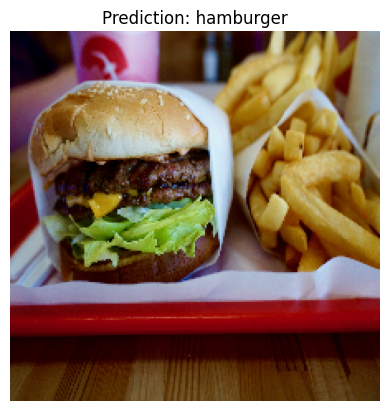

In [44]:
prediction = predict_img("03-hamburger.jpeg",resnet_model)
print(prediction)

In [45]:
load_img("03-hamburger.jpeg")

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.        , 0.        , 0.07553022],
        [0.        , 0.        , 0.04705882],
        [0.        , 0.        , 0.07843138],
        ...,
        [0.5734096 , 0.6479194 , 0.7028214 ],
        [0.56816983, 0.6437612 , 0.7104279 ],
        [0.5953191 , 0.6423779 , 0.7286524 ]],

       [[0.        , 0.        , 0.06642658],
        [0.        , 0.0012605 , 0.05756303],
        [0.00784314, 0.        , 0.05490196],
        ...,
        [0.5628868 , 0.62563187, 0.67661226],
        [0.5736749 , 0.61753327, 0.6940843 ],
        [0.5750908 , 0.6182281 , 0.6888163 ]],

       [[0.00392157, 0.        , 0.03025207],
        [0.0060224 , 0.00228091, 0.03347338],
        [0.02140858, 0.00156062, 0.05672269],
        ...,
        [0.57314974, 0.6120481 , 0.637697  ],
        [0.5588153 , 0.6176388 , 0.6397704 ],
        [0.53857887, 0.60806525, 0.6533416 ]],

       ...,

       [[0.33485377, 0.21820688, 0.06868719],
        [0.35

In [38]:
img = tf.io.decode_jpeg(img,channels = 3)

In [34]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 44ms/step


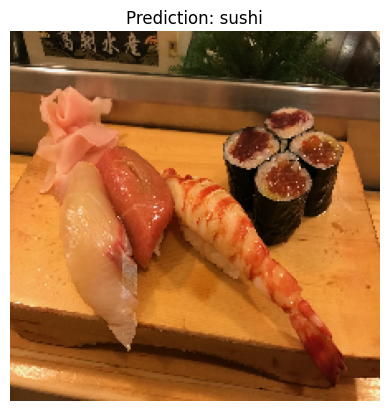

In [42]:
predict_img("03-sushi.jpeg")

1/1 [==============================] - 2s 2s/step


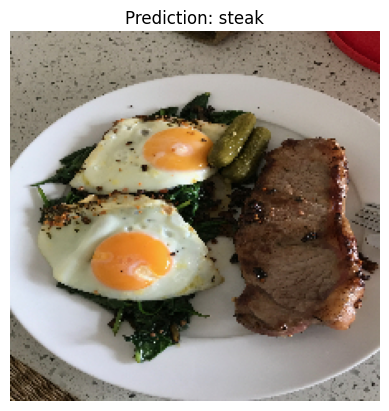

In [46]:
predict_img("03-steak.jpeg",effnet_model)

1/1 [==============================] - 0s 29ms/step


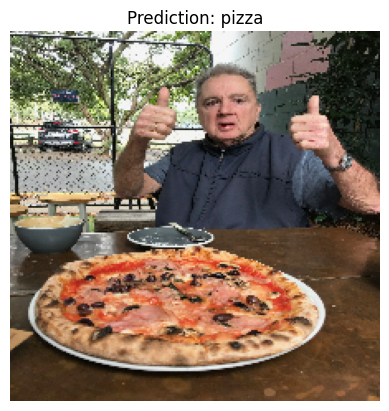

In [47]:
predict_img("03-pizza-dad.jpeg",effnet_model)